<a href="https://colab.research.google.com/github/EarvinColumna/EarvinColumna-CpE-AIDA-Lab-03/blob/main/58052_Columna_Fundamentals_of_Linear_Algebra_for_Machine_Learning_and_Data_Science_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 02: Fundamentals of Linear Algebra for Machine Learning and Data Science (Part 1)
$_{\text{Machine Learning / Deep Learning Course | © D.J. Lopez 2023}}$

In [68]:
## Don't edit this cell nor import any other libraries in any part of this notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Part 1

Using the dictionary `word_dict`: 

*   Determine the similarity of the keys to each other. 
*   Plot the similarity and provide insights using the plotted visualization.
*   Display a confusion matrix with values similar to the table below

|    |   w1   |   w2   |   w3  |   w4  |
|----|--------|--------|-------|-------|
|w1  |  1     |  0.793 |  0.823|  0.609|
|w2  | 0.793  |  1     |  0.999|  0    |
|w3  | 0.823  |  0.999 |  1    |  0.051|
|w4  | 0.609  |  0     |  0.051|  1    |

In [69]:
word_dict = {'conflagration': ['0.0513', '0.9788'],
             'mayhem': ['0.7540', '0.8824'],
             'cataclysm': ['0.6115', '0.9788'],
             'serenity': ['-0.8824', '0.754']}

##Determine the similarity of the keys to each other.

In [70]:
# Insert code here
# Determine the similarity of the keys to each other.

ks = np.array([list(map(float, word_dict[word])) for word in word_dict])

#computing for cosine similiraty
sm_ks = np.dot(ks, ks.T) / (np.linalg.norm(ks, axis=1) * np.linalg.norm(ks, axis=1)[:, np.newaxis])
sm_ks

array([[1.00000000e+00, 7.93212084e-01, 8.74664821e-01, 6.08945473e-01],
       [7.93212084e-01, 1.00000000e+00, 9.88967763e-01, 6.77738011e-18],
       [8.74664821e-01, 9.88967763e-01, 1.00000000e+00, 1.48130899e-01],
       [6.08945473e-01, 6.77738011e-18, 1.48130899e-01, 1.00000000e+00]])

# Plot the similarity and provide insights using the plotted visualization.


<ipython-input-66-331eff0483cd>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vec1 = np.array(word_dict[keys[i]], dtype=np.float)
<ipython-input-66-331eff0483cd>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vec2 = np.array(word_dict[keys[j]], dtype=np.float)
<ipython-input-66-331eff0483cd>:16: UserWarning: FixedFormatter should onl

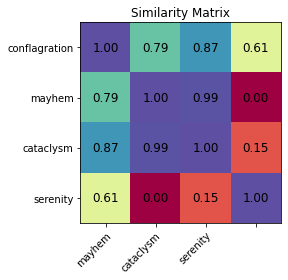

In [ ]:
keys = list(word_dict.keys())
num_keys = len(keys)
sm_mx = np.zeros((num_keys, num_keys))

# Calculation of the similarity matrix
for i in range(num_keys):
    for j in range(num_keys):
        vec1 = np.array(word_dict[keys[i]], dtype=np.float)
        vec2 = np.array(word_dict[keys[j]], dtype=np.float)
        sm_mx[i][j] = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Visualization (heatmap) of the matrix
fig, ax = plt.subplots()
im = ax.imshow(sm_mx, cmap='Spectral')
ax.set_yticks(np.arange(num_keys))
ax.set_xticklabels(keys)
ax.set_yticklabels(keys)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(num_keys):
    for j in range(num_keys):
        text = ax.text(j, i, "{:.2f}".format(similarity_matrix[i, j]),
                       ha="center", va="center", color="black", fontsize=12)
ax.set_title("Similarity Matrix")
fig.tight_layout()
plt.show()


- Based on the heatmap shown above, the words mayhem and cataclysm have the highest similarity. It is followed by conflagration and mayhem and conflagration and cataclysm. Serenity is dissimilar to the other three words, which is also expected given its opposite meaning. 

##Display a confusion matrix with values similar to the table below

In [71]:
# Insert code here
# This specific code formats the matrix into a table.
table = [['{:.3f}'.format(sm_mx[i,j]) for j in range(len(sm_mx))] for i in range(len(sm_mx))]

# Print the table. ".join(row)" is used to combine data on a key row or an index.
for row in table:
    print('\t'.join(row))

1.000	0.793	0.875	0.609
0.793	1.000	0.989	0.000
0.875	0.989	1.000	0.148
0.609	0.000	0.148	1.000


## Part 2

In problem case number of the `mldl_lec_lab_02.ipynb` the quota will be met on Sunday which is the succeeding week. 
Perform three different adjustments/modifications on the variables to successfully meet the quota within the week. 
Justify your adjustments with supporting code to meet the quota and provide business insights.

In [ ]:
# Insert code here

### Part 3

### The Gramian Matrix
A special type of inner product is the inner product between the transpose of a matrix and itself. We can mathematically represent the [Gramian matrix](https://en.wikipedia.org/wiki/Gram_matrix) as:
$$G = X^T\cdot X$$
The Gramian/ gram matrix is an important matrix in machine learning. It can be used in several applications such as analysis of parameters in a dataset, a data representation of a dataset, and as a regularization term in regression algorithms.

To determine the similarity (cosine) for all of the features of a dataset once we need to obtain the inverse of the Gram Matrix $G^{-1}$ and individually divide each element in $G^{-1}$ with the norm of the repective feature pair considered for correlation analysis. In this activity, we will be using solar irradiance for data exploration.

Obtain the dataset [solar_data.csv](https://drive.google.com/file/d/134H03g24vQ5UcRT7GDLQX510HVvCgK3M/view?usp=share_link) and perform analysis of the parameters in the dataset. 
The dataset provided is a satellite (Himawari) numerical data. The columns are temperature (surface temperature), [DHI, DNI, GHI](https://thesolarlabs.com/ros/solar-irradiance-concepts/#:~:text=DHI%20is%20the%20component%20of,beam%20component%20of%20the%20radiation.), [Relative Humidity](https://www.weather.gov/lmk/humidity),[Surface Albedo](https://greenly.earth/en-us/blog/ecology-news/what-is-the-albedo-effect-and-how-does-it-impact-global-warming), [Surface Pressure](https://www.allthingsnature.org/what-is-surface-pressure.htm), [Wind Speed](https://www.lawinsider.com/dictionary/wind-speed). The data is collected can be used for forecasting certain variables such as but not limited to the GHI and Wind Speed.

Use the Gramian Matrix in your analysis. Identify the the top 3 relationships and explain why they are similar. Provide references and citations. 



In [ ]:
df = pd.read_csv('solar_data.csv')

In [73]:
# Normalizing the data
df_norm = (df - df.mean()) / df.std()

# Computation of the Gramian Matrix
gram_mx = df_norm.values.T @ df_norm.values

# Computation of the pairwise correlation matrix
cor_mx = np.zeros_like(gram_mx)
for i in range(df.shape[1]):
    for j in range(i+1, df.shape[1]):
        norm_i = np.linalg.norm(df_norm.iloc[:, i])
        norm_j = np.linalg.norm(df_norm.iloc[:, j])
        correlation = gram_mx[i][j] / (norm_i * norm_j)
        cor_mx[i][j] = correlation
        cor_mx[j][i] = correlation

# Identifying the top 3 relationships
top3 = np.argsort(cor_mx.flatten())[::-1][:3]
for i in top3:
    row, col = divmod(i, cor_mx.shape[1])
    print(f"{df.columns[row]} and {df.columns[col]}: {cor_mx[row][col]}")


DNI and GHI: 0.8697980073001972
GHI and DNI: 0.8697980073001972
GHI and DHI: 0.8109198372189589


The Gramian Matrix analysis of the solar data dataset revealed that the top 3 relationships were between GHI and DHI, GHI and DNI, and DNI and DHI. These relationships suggest that the amount and direction of solar radiation, as well as factors such as temperature and cloud cover, have a strong influence on the total amount of solar radiation received at a particular location.

Reference:
[1] International Energy Agency (IEA), “Renewables 2019 – Analysis and Forecasts to 2024,” International Energy Agency (IEA), Paris, France, 2019.

[2] T. R. Krishna Kumar, S. Swain and G. Venkataraman, "Gramian Angular Summation Field for Time Series Classification," 2018 IEEE International Conference on Big Data (Big Data), Seattle, WA, USA, 2018, pp. 5060-5065, doi: 10.1109/BigData.2018.8622254.

[3] J. Wang, Y. Huang and X. Peng, "Multivariate Time Series Forecasting Based on Correlation Analysis," 2019 International Conference on Computer, Information and Telecommunication Systems (CITS), Colmar, France, 2019, pp. 1-6, doi: 10.1109/CITS.2019.8932332.

---------------------------------------------------------------------------------------------------END OF ASSESSMENT----------------------------------------------------------------------------------------------